In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv')
df.head(30)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5517 non-null   int64  
 1   name                     5517 non-null   object 
 2   date                     5517 non-null   object 
 3   manner_of_death          5517 non-null   object 
 4   armed                    5304 non-null   object 
 5   age                      5273 non-null   float64
 6   gender                   5516 non-null   object 
 7   race                     4947 non-null   object 
 8   city                     5517 non-null   object 
 9   state                    5517 non-null   object 
 10  signs_of_mental_illness  5517 non-null   bool   
 11  threat_level             5517 non-null   object 
 12  flee                     5258 non-null   object 
 13  body_camera              5517 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
B_brutality = df.query("race =='B'")

In [ ]:
B_brutality.head(30)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
11,21,Ron Sneed,2015-01-07,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
14,27,Omarr Julian Maximillian Jackson,2015-01-07,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False
26,49,Marcus Golden,2015-01-14,shot,NaN,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False
28,51,Mario Jordan,2015-01-14,shot,gun,34.0,M,B,Chesapeake,VA,True,attack,Not fleeing,False
32,56,Donte Sowell,2015-01-15,shot,gun,27.0,M,B,Indianapolis,IN,False,attack,Foot,False
33,57,Kavonda Earl Payton,2015-01-15,shot,gun,39.0,M,B,Aurora,CO,False,attack,Not fleeing,False
39,74,Terence Walker,2015-01-17,shot,gun,21.0,M,B,Muskogee,OK,False,attack,Foot,True


In [ ]:
B_brutality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 9 to 5498
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1308 non-null   int64  
 1   name                     1308 non-null   object 
 2   date                     1308 non-null   object 
 3   manner_of_death          1308 non-null   object 
 4   armed                    1249 non-null   object 
 5   age                      1284 non-null   float64
 6   gender                   1308 non-null   object 
 7   race                     1308 non-null   object 
 8   city                     1308 non-null   object 
 9   state                    1308 non-null   object 
 10  signs_of_mental_illness  1308 non-null   bool   
 11  threat_level             1308 non-null   object 
 12  flee                     1257 non-null   object 
 13  body_camera              1308 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
start_date = "2020-01-01"

In [ ]:
date2020 = B_brutality["date"] >= start_date

In [ ]:
B_2020 = B_brutality.loc[date2020]

In [ ]:
B_2020.head(113)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4937,5349,Jamari Daiwon Tarver,2020-01-02,shot,vehicle,26.0,M,B,North Las Vegas,NV,False,attack,Car,True
4941,5341,Tyree Davis,2020-01-04,shot and Tasered,knife,25.0,M,B,Chicago,IL,False,other,Not fleeing,False
4943,5335,Kwamae Jones,2020-01-05,shot,gun,17.0,M,B,Jacksonville,FL,False,attack,Car,False
4944,5336,Brandon D. Roberts,2020-01-05,shot,knife,27.0,M,B,Milford,DE,True,other,Not fleeing,False
4946,5352,Miciah Lee,2020-01-05,shot,gun,18.0,M,B,Sparks,NV,True,other,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,5998,Darius Washington,2020-07-18,shot,gun,24.0,M,B,Chicago Heights,IL,False,attack,Foot,False
5479,5999,Vincent Harris,2020-07-20,shot,gun,51.0,M,B,Baton Rouge,LA,False,attack,Not fleeing,True
5482,6004,Southern Jeremy,2020-07-21,shot,gun,22.0,M,B,Sacramento,CA,False,attack,Not fleeing,True
5488,6022,David Earl Brooks,2020-07-24,shot,gun,45.0,M,B,Roxboro,NC,False,attack,Not fleeing,False


In [ ]:
B_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 4937 to 5498
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       114 non-null    int64  
 1   name                     114 non-null    object 
 2   date                     114 non-null    object 
 3   manner_of_death          114 non-null    object 
 4   armed                    114 non-null    object 
 5   age                      113 non-null    float64
 6   gender                   114 non-null    object 
 7   race                     114 non-null    object 
 8   city                     114 non-null    object 
 9   state                    114 non-null    object 
 10  signs_of_mental_illness  114 non-null    bool   
 11  threat_level             114 non-null    object 
 12  flee                     107 non-null    object 
 13  body_camera              114 non-null    bool   
dtypes: bool(2), float64(1)

In [ ]:
BM_2020 = B_2020.query("gender == 'M'")

In [ ]:
BM_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 4937 to 5498
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       113 non-null    int64  
 1   name                     113 non-null    object 
 2   date                     113 non-null    object 
 3   manner_of_death          113 non-null    object 
 4   armed                    113 non-null    object 
 5   age                      112 non-null    float64
 6   gender                   113 non-null    object 
 7   race                     113 non-null    object 
 8   city                     113 non-null    object 
 9   state                    113 non-null    object 
 10  signs_of_mental_illness  113 non-null    bool   
 11  threat_level             113 non-null    object 
 12  flee                     106 non-null    object 
 13  body_camera              113 non-null    bool   
dtypes: bool(2), float64(1)

In [ ]:
BM_2020.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5479,5999,Vincent Harris,2020-07-20,shot,gun,51.0,M,B,Baton Rouge,LA,False,attack,Not fleeing,True
5482,6004,Southern Jeremy,2020-07-21,shot,gun,22.0,M,B,Sacramento,CA,False,attack,Not fleeing,True
5488,6022,David Earl Brooks,2020-07-24,shot,gun,45.0,M,B,Roxboro,NC,False,attack,Not fleeing,False
5492,6010,David Earl Brooks,2020-07-27,shot,gun,45.0,M,B,Roxboro,NC,False,other,NaN,False
5498,6029,Darrien Walker,2020-07-30,shot and Tasered,sword,28.0,M,B,Detroit,MI,False,attack,Not fleeing,False


In [ ]:
BF_2020 = B_2020.query("gender == 'F'")

In [ ]:
BF_2020

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5129,5626,Breonna Taylor,2020-03-12,shot,unarmed,26.0,F,B,Louisville,KY,False,undetermined,Not fleeing,False


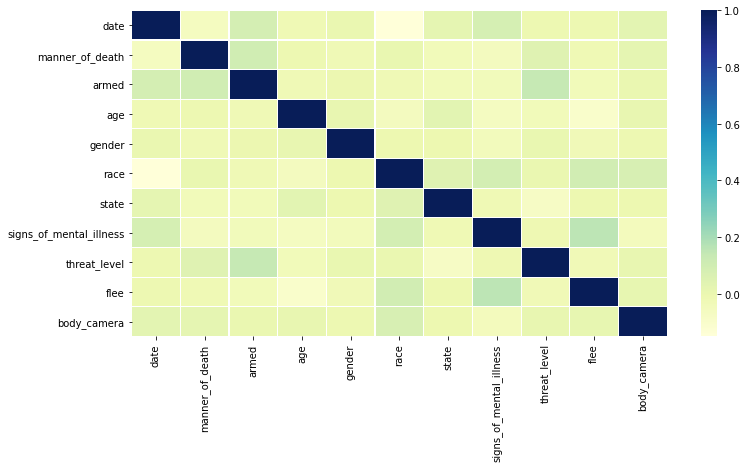

In [ ]:
plt.figure(figsize=(12, 6))
df.drop(['id', 'name', 'city'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

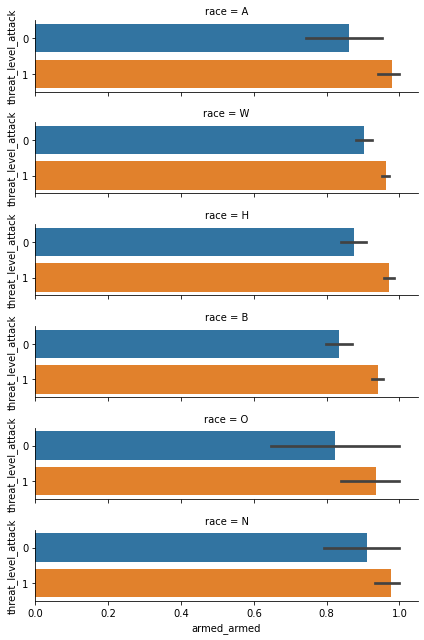

In [ ]:
ax = sns.catplot(y="threat_level_attack", x="armed_armed", row="race", kind="bar", data=ddf, height=1.5, aspect=4, orient='h')

In [ ]:
B_2020.to_excel('PoliceBrutalityTimeLine.xlsx')

Text(0, 0.5, 'No of Fatalities')

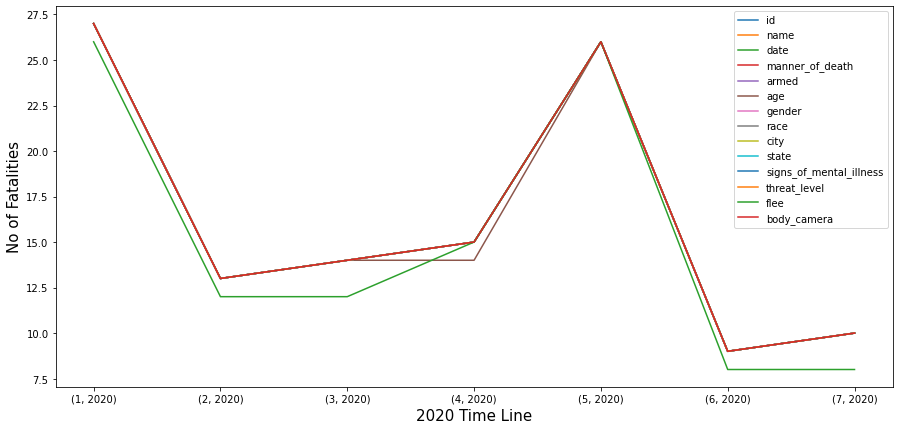

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
B_2020.index = pd.to_datetime(B_2020['date'],format='%Y-%m-%d')
B_2020.groupby(by=[B_2020.index.month, B_2020.index.year]).count().plot(ax=ax)
ax.set_xlabel('2020 Time Line', fontsize=15)
ax.set_ylabel('Number of Fatalities', fontsize=15)

Text(0, 0.5, 'Number of Fatalities')

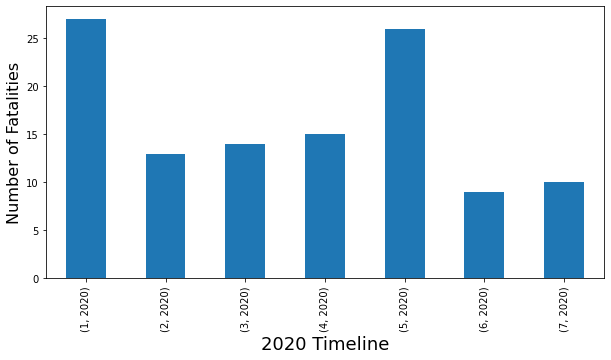

In [ ]:
week_groups = B_2020.groupby(by=[B_2020.index.month, B_2020.index.year])['id'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)
fig.suptitle('Police Brutality', fontsize=14, fontweight='bold')
plt.xlabel('2020 Timeline', fontsize=18)
plt.ylabel('Number of Fatalities', fontsize=16)


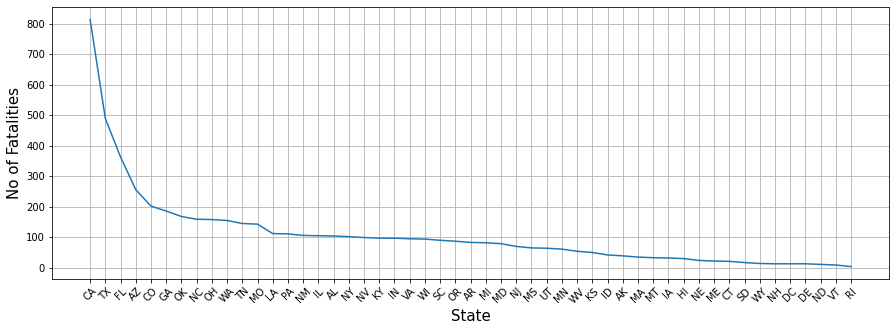

In [ ]:
fig = plt.figure()
ax = df.state.value_counts().plot(figsize=(15,5))
ax.set_xticks(range(len(df.state.value_counts())));
ax.set_xticklabels([item for item in df.state.value_counts().index.tolist()], rotation=45);
ax.grid()
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('No of Fatalities', fontsize=15)
fig.savefig('Police_Brutality_in_each_state.png',dpi=300, bbox_inches='tight')

In [ ]:
df.state.value_counts().head()

CA    814
TX    489
FL    363
AZ    256
CO    202
Name: state, dtype: int64

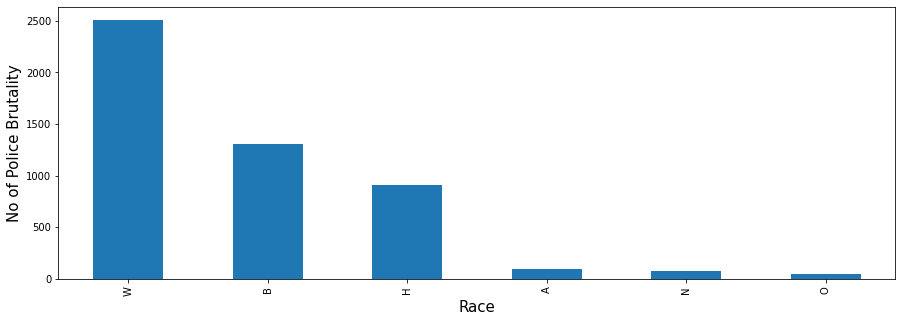

In [ ]:
fig = plt.figure()
ax = df.race.value_counts().plot(kind='bar',figsize=(15, 5))
ax.set_xlabel('Race', fontsize=15)
ax.set_ylabel('No of Police Brutality', fontsize=15)
fig.savefig('Police_Brutality_against_each_Race.png',dpi=300, bbox_inches='tight')

In [ ]:
df.race.value_counts()

W    2508
B    1308
H     911
A      94
N      78
O      48
Name: race, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df.date)
df['date'] = df.date.map(lambda x: x.strftime('%Y-%m'))

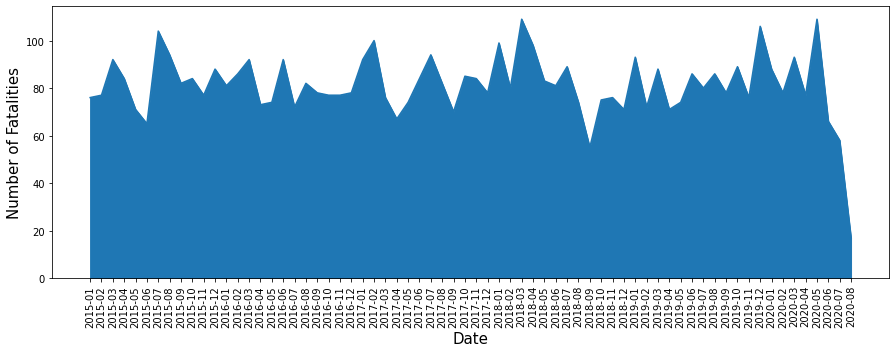

In [ ]:
fig = plt.figure()
ax = df.date.value_counts().sort_index().plot(kind='area',figsize=(15,5))
ax.set_xticks(range(len(df.date.value_counts().sort_index())));
ax.set_xticklabels([item for item in df.date.value_counts().sort_index().index.tolist()], rotation=90);
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Number of Fatalities', fontsize=15)
fig.savefig('Police_Brutality_over_time.png',dpi=300, bbox_inches='tight')

In [ ]:
df.date.value_counts()

2020-05    109
2018-03    109
2019-12    106
2015-07    104
2017-02    100
          ... 
2020-06     66
2015-06     65
2020-07     58
2018-09     55
2020-08     17
Name: date, Length: 68, dtype: int64

In [ ]:
for i in range(len(df.armed)):
    if df['armed'][i] != 'unarmed':
        df['armed'][i] = 'armed'
    else:
        pass
df.head()

,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01,shot,armed,53.0,M,A,WA,True,attack,Not fleeing,False
1,2015-01,shot,armed,47.0,M,W,OR,False,attack,Not fleeing,False
2,2015-01,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False
3,2015-01,shot,armed,32.0,M,W,CA,True,attack,Not fleeing,False
4,2015-01,shot,armed,39.0,M,H,CO,False,attack,Not fleeing,False


In [ ]:
ddf = pd.get_dummies(df,columns = ['manner_of_death','armed','gender','signs_of_mental_illness','threat_level','flee','body_camera'])
ddf.to_csv('Dummies.csv',index=False)
ddf.head()

,date,age,race,state,manner_of_death_shot,manner_of_death_shot and Tasered,armed_armed,armed_unarmed,gender_F,gender_M,signs_of_mental_illness_False,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,body_camera_False,body_camera_True
0,2015-01,53.0,A,WA,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0
1,2015-01,47.0,W,OR,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0
2,2015-01,23.0,H,KS,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0
3,2015-01,32.0,W,CA,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0
4,2015-01,39.0,H,CO,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0


In [ ]:
df_2020 = df["date"] >= start_date

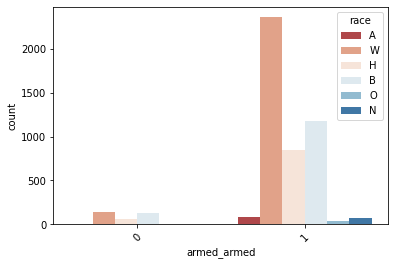

In [ ]:
plt.figure()
chart = sns.countplot(x='armed_armed', data=ddf, hue = "race", palette='RdBu')
plt.setp(chart.get_xticklabels(), rotation=45)
plt.show()

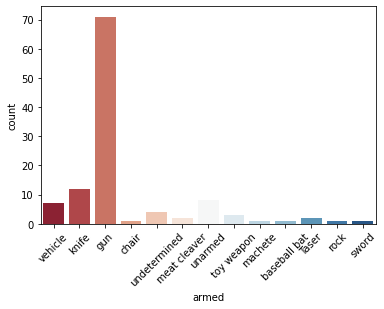

In [ ]:
plt.figure()
chart = sns.countplot(x='armed', data=B_2020, palette='RdBu')
plt.setp(chart.get_xticklabels(), rotation=45)
plt.show()

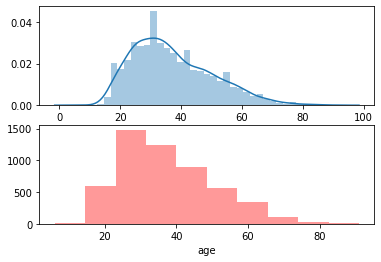

In [ ]:
fig, ax = plt.subplots(2,1)

sns.distplot(ddf['age'], ax=ax[0]);
sns.distplot(df['age'], kde=False, bins=10, color='r', ax=ax[1]);

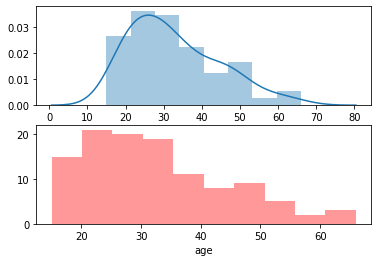

In [ ]:
fig, ax = plt.subplots(2,1)

sns.distplot(B_2020['age'], ax=ax[0]);
sns.distplot(B_2020['age'], kde=False, bins=10, color='r', ax=ax[1]);

In [ ]:
drf = pd.get_dummies(df,columns = ['race','manner_of_death','armed','gender','signs_of_mental_illness','threat_level','flee','body_camera'])
drf = drf.drop('state', axis=1)
drf = drf.drop('date', axis=1)
drf = drf.drop('age', axis=1)

drf.to_csv('Dummies.csv',index=False)
drf.head()

,race_A,race_B,race_H,race_N,race_O,race_W,manner_of_death_shot,manner_of_death_shot and Tasered,armed_armed,armed_unarmed,gender_F,gender_M,signs_of_mental_illness_False,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,body_camera_False,body_camera_True
0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0


In [ ]:
drf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   race_A                            5517 non-null   uint8
 1   race_B                            5517 non-null   uint8
 2   race_H                            5517 non-null   uint8
 3   race_N                            5517 non-null   uint8
 4   race_O                            5517 non-null   uint8
 5   race_W                            5517 non-null   uint8
 6   manner_of_death_shot              5517 non-null   uint8
 7   manner_of_death_shot and Tasered  5517 non-null   uint8
 8   armed_armed                       5517 non-null   uint8
 9   armed_unarmed                     5517 non-null   uint8
 10  gender_F                          5517 non-null   uint8
 11  gender_M                          5517 non-null   uint8
 12  signs_of_mental_illness_False     

In [ ]:
X_df = drf.drop("race_B", axis=1)
y_df = drf["race_B"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.3, random_state=833)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(solver='liblinear') 

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,race_A,race_H,race_N,race_O,race_W,manner_of_death_shot,manner_of_death_shot and Tasered,armed_armed,armed_unarmed,gender_F,gender_M,signs_of_mental_illness_False,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,body_camera_False,body_camera_True,race_B,predicted
0,1549,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
1,2373,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
2,363,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0
3,4191,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0
4,3685,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
drop_redundant = drop = ['armed_unarmed', 'Gender_F', 'manner_of_death_shot and Tasered',
        'body_camera_False']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9015700483091788

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
print("Our model is", round(sum(ytest == y_model)/len(y_model),2), "accurate!")

Our model is 0.9 accurate!
